
# <p style="text-align: center;">MIS382: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 2</p>
## <p style="text-align: center;">Total points: 40</p>
## <p style="text-align: center;"> Timothy Lai (ttl353) and Meyappan Subbaiah (ms47296) </p>
## <p style="text-align: center;">Due: Wed, October 4th, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group.  

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1 - Bias-variance Trandeoff (2pts)
How does the choice of K in the K-nearest neighbor classifier reflect a bias-variance tradeoff?

## Answer

A low choice of K would reflect high variance and low bias. For example, a choice of K=1 would almost certainly overfit the data - the model would try to fit to each point and therefore we could also be incorporating a lot of noise from the data. Bias would be low since the average difference between estimated and true values is not skewed since every point is considered.

Comparatively, a high choice of K would reflect low variance and high bias. In this case, we would likely be underfitting the data.

# Question 2: Data Exploration and Regression Analysis (4+3+4+4=15pts)

Consider the dataset provided (russett_full_v2.csv) about agricultural inequality, industrial development and political instability in different countries. More information about it can be found [here](https://www.rdocumentation.org/packages/plspm/versions/0.4.9/topics/russett) though the data itself is slightly different than that referenced in the link.

a) (4 points) Generate box-plots of the "rent" (% of farmers that rent all their land), "inst" (measure of political stability in the executive branch), "ecks" (number of violent internal war incidents ) and "demo_score" ( derived measure of the level of a country's democracy from 1945 to 61 ) and identify the cutoff values for outliers. 

Generate 3 scatterplots of "rent" against "demo_score", "inst" against "demo_score" and "ecks" against "demo_score" with the identified outliers colored differently than non-outliers in each; comment on how inclusion of the outliers would affect a predictive model for the "demo_score" response.  

b) (3 points) Let us try to fit an MLR, using ordinary least squares, to this dataset with "demo_score" as the dependent variable using only the predictors 'rent','inst', and 'ecks' . 

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state=22)   

Report the RMSE obtained on both X_train and X_test. How much does this increase when you score your model on X_test?

c) (4 points ) Try to predict ”demo_score” using a robust regression using Huber loss.  You can use the [sklearn package](  http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html).  Set regularization parameter alpha to 0.0 and all other parameters as default.
Report RMSE obtained on both X_train and X_test.

d) (4 points ) Compare and comment on the model fits obtained in (b) and (c) and plot the residual plots using all data for each model. How do outliers affect the relative performance of ordinary least squares regression, and robust regression with Huber loss in general? 

## Answer

### Part (a)

In [1]:
import pandas as pd
import numpy as np
import plotly
import plotly.graph_objs as go
import matplotlib.pyplot as plt
%matplotlib inline  

russett = pd.read_csv('russett_full_v2.csv')
russett.head()

,country,gini,farm,rent,gnpr,labo,inst,ecks,death,demo_class,demo_score
0,Argentina,86.3,98.2,47.9,374,25,16.6,47.0,217,2,35
1,Australia,92.9,99.6,30.0,1215,14,19.3,0.0,0,1,89
2,Austria,74.0,97.4,25.7,532,32,15.8,4.0,0,2,52
3,Belgium,58.7,85.8,98.3,1015,10,23.5,8.0,1,1,98
4,Bolivia,93.8,97.7,35.0,66,72,18.3,43.0,663,3,19


In [2]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

X = russett[['rent', 'inst', 'ecks']]
y = russett['demo_score']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state=22)

reg = linear_model.LinearRegression()
result = reg.fit(X_train, y_train)

result_y_train_pred = result.predict(X_train)
result_y_pred = result.predict(X_test)
print("(In sample) Mean squared error is: %.2f" % mean_squared_error(y_train,result_y_train_pred))
print("(Out of sample) Mean squared error: %.2f" % mean_squared_error(y_test, result_y_pred))

(In sample) Mean squared error is: 664.68
(Out of sample) Mean squared error: 1061.50


We see that when we run the regression on X_test vs. X_train, the MSE increases from 664.68 to 1061.50. This tells us that the model is slightly overfit to the training data.

### Part (c) Try to predict ”demo_score” using a robust regression using Huber loss. You can use the sklearn package. Set regularization parameter alpha to 0.0 and all other parameters as default. Report RMSE obtained on both X_train and X_test.

In [3]:
huber = linear_model.HuberRegressor(alpha=0)
result_huber = huber.fit(X_train,y_train)

result_y_train_pred_huber = result_huber.predict(X_train)
result_y_pred_huber = result_huber.predict(X_test)
print("(In sample) Mean squared error is: %.2f" % mean_squared_error(y_train,result_y_train_pred_huber))
print("(Out of sample) Mean squared error: %.2f" % mean_squared_error(y_test, result_y_pred_huber))

(In sample) Mean squared error is: 720.16
(Out of sample) Mean squared error: 850.68


We see that when we run the regression on X_test vs. X_train, the MSE increases from 720.16 to 850.68. Again, this tells us that the model is slightly overfit to the training data.

### d) (4 points) Compare and comment on the model fits obtained in (b) and (c) and plot the residual plots using all data for each model. How do outliers affect the relative performance of ordinary least squares regression, and robust regression with Huber loss in general?

Populating the interactive namespace from numpy and matplotlib


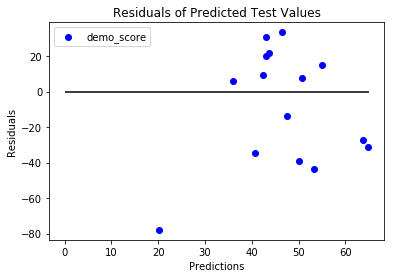

In [13]:
## For MLR

%pylab inline
plt.scatter(result_y_pred, result_y_pred-y_test, color='blue')
plt.hlines(y=0, xmin = 0, xmax = 65)
xlabel('Predictions')
ylabel('Residuals')
title('Residuals of Predicted Test Values')
legend(numpoints = 1, loc='upper left')
plt.show()

Populating the interactive namespace from numpy and matplotlib


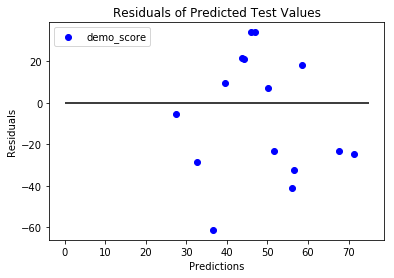

In [12]:
## For Robust Regression

%pylab inline
plt.scatter(result_y_pred_huber, result_y_pred_huber-y_test, color='blue')
plt.hlines(y=0, xmin = 0, xmax = 75)
xlabel('Predictions')
ylabel('Residuals')
title('Residuals of Predicted Test Values')
legend(numpoints = 1, loc='upper left')
plt.show()

# Question 3 - Sampling (4+4=8pts)

1. NBC has come up with an extreme TV show, and each of its viewers either likes or hates it. (no middle ground here; we are in a “black and white age”). NBC wants to estimate what fraction p of its audience like the show by “randomly” calling n viewers and tallying their responses so as to estimate the true value of p to a fractional accuracy of within ±ε%, with a confidence of (1 − α) × 100%. For α = 0.10, ε = 0.03 (i.e. your answer will be $\hat{p}$ ± 0.03), what is the minimum value of n needed if true value (i) p = 0.5, (ii) p=0.25? 

2. Suppose for a certain value of p and choice of ε, you calculate that you will need 1000 samples for α = 0.02. You now decide to obtain a more accurate answer by either (i) reducing α to 0.01, keeping the same ε or by (ii) reducing ε by a factor of 2 from the original value, and increasing α to 0.05. In each case how many samples would you need now?

## Answer

# Question 4 - Principal Component Analysis (10 points)

Import the diabetes dataset as in Q1 and add the interaction variables.
You should have 65 variables and one target variable.

In [1]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

from sklearn.preprocessing import PolynomialFeatures
X = PolynomialFeatures(2, include_bias=False).fit_transform(X)

Next, use [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to center and scale each feature as follows.

In [2]:
from sklearn.preprocessing import StandardScaler
stdScaler = StandardScaler()
X = stdScaler.fit_transform(X)

(a) Perform PCA using the sklearn [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) package.  Create i) a scree plot depicting the proportion of variance and ii) a cumulative proportion of variance explained by the principal components of the data (X matrix).  Refer to Figure 10.4 of JW for an example.  You may use the output attribute *explained variance ratio*. (3pts)

(b) How many principal components (N1, N2, N3) are required to explain cumulative variance of 30%, 60%, and 90%, respectively? (3pts)

(c) Fit an ordinary least squares linear regression using N1, N2, and N3 number of principal components, respectively. (This is called Principal Components Regression) Use entire dataset, e.g. 442 rows. Evaluate the models using mean squared error (MSE). (4pts)

## Answer

### Part (a)

In [3]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)

print(pca.explained_variance_ratio_)

[  1.65760310e-01   9.11048824e-02   7.93102914e-02   6.47063057e-02
   5.16146393e-02   4.46609598e-02   3.90821532e-02   3.81648199e-02
   3.34517955e-02   3.01617730e-02   2.86891634e-02   2.67410504e-02
   2.14462865e-02   1.98254700e-02   1.86023192e-02   1.74021265e-02
   1.64881914e-02   1.46428154e-02   1.39437835e-02   1.31157063e-02
   1.27742577e-02   1.19337100e-02   1.07171028e-02   9.98388272e-03
   9.67669210e-03   9.24823727e-03   9.15468698e-03   8.17972381e-03
   8.05754323e-03   7.72336857e-03   7.25247433e-03   6.93999798e-03
   6.37638876e-03   6.28322815e-03   5.38949634e-03   4.91377412e-03
   4.61210385e-03   4.38315683e-03   4.07409300e-03   3.81773440e-03
   3.57684111e-03   3.35109170e-03   3.01884009e-03   2.47630841e-03
   1.49308702e-03   1.32446495e-03   8.91369137e-04   7.65847736e-04
   6.15120961e-04   5.43832243e-04   3.77477454e-04   3.49696244e-04
   2.23371071e-04   1.71352662e-04   9.57812402e-05   7.17298006e-05
   6.67094867e-05   6.03570797e-05

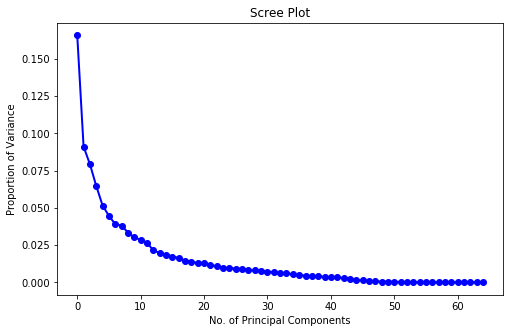

In [4]:
import matplotlib.pyplot as plt

# i) A scree plot depicting the proportion of variance

fig = plt.figure(figsize=(8,5))
plt.plot(pca.explained_variance_ratio_, 'bo-', linewidth = 2)
plt.title('Scree Plot')
plt.xlabel('No. of Principal Components')
plt.ylabel('Proportion of Variance')
plt.show()

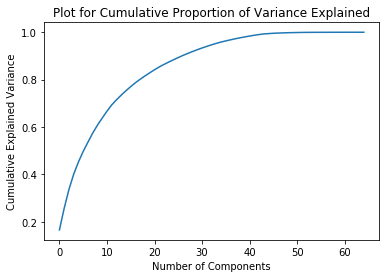

In [5]:
# ii) Plot depicting cumulative proportion of variance explained by principal components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Plot for Cumulative Proportion of Variance Explained')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

### Part b) How many principal components (N1, N2, N3) are required to explain cumulative variance of 30%, 60%, and 90%, respectively?

In [6]:
cum_variance = np.cumsum(pca.explained_variance_ratio_)
print 'Number of components to explain 30% cumulative variance:', len(cum_variance[np.where(cum_variance <= .30)])+1
print 'Number of components to explain 60% cumulative variance:', len(cum_variance[np.where(cum_variance <= .60)])+1
print 'Number of components to explain 90% cumulative variance:', len(cum_variance[np.where(cum_variance <= .90)])+1


Number of components to explain 30% cumulative variance: 3
Number of components to explain 60% cumulative variance: 9
Number of components to explain 90% cumulative variance: 27


### Part c) Fit an ordinary least squares linear regression using N1, N2, and N3 number of principal components, respectively. (This is called Principal Components Regression) Use entire dataset, e.g. 442 rows. Evaluate the models using mean squared error (MSE).

#### For N=3 components:

In [8]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

pca_3 = PCA(n_components=3)
X_pca_3 = pca_3.fit_transform(X)

reg_3 = linear_model.LinearRegression()
result_3 = reg_3.fit(X_pca_3, y)

result_y_pred_3 = result_3.predict(X_pca_3)
print("Mean squared error using N=3 components is: %.2f" % mean_squared_error(y,result_y_pred_3))

Mean squared error using N=3 components is: 5120.61


#### For N=9 components:

In [9]:
pca_9 = PCA(n_components=9)
X_pca_9 = pca_9.fit_transform(X)

reg_9 = linear_model.LinearRegression()
result_9 = reg_9.fit(X_pca_9, y)

result_y_pred_9 = result_9.predict(X_pca_9)
print("Mean squared error using N=9 components is: %.2f" % mean_squared_error(y,result_y_pred_9))

Mean squared error using N=9 components is: 3942.79


#### For N=27 components:

In [10]:
pca_27 = PCA(n_components=27)
X_pca_27 = pca_27.fit_transform(X)

reg_27 = linear_model.LinearRegression()
result_27 = reg_27.fit(X_pca_27, y)

result_y_pred_27 = result_27.predict(X_pca_27)
print("Mean squared error using N=27 components is: %.2f" % mean_squared_error(y,result_y_pred_27))

Mean squared error using N=27 components is: 2857.43


# Question 5 -  Feature Selection ( 5 points )

Explain what you understand by the two wrapper methods for feature selection (forward and backward selection) (no more than 1 paragraph). 


### Answer

Both wrapper methods are used for variable selection. In forward selection, we begin with the null model and fit `p` simple linear regressions and add to the null model until we have the lowest RSS, which measures the amount of variability that is left unexplained after performing the regression. Comparatively in backward selection, all variables are included in the model and we remove the variable with the largest p-value in an iterative process until a stopping rule is reached. Forward selection can always be used, but generally is considered more "greedy", since we may include variables early that later become redundant.